# K-Means Clustering for Customer Data.
## 1. Importing Libraries and Downloading Dataset

In [ ]:
!pip install opendatasets
!pip install yellowbrick


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 28.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import opendatasets as od
from sklearn.cluster import KMeans
from utils import clustering as k
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
import os
warnings.filterwarnings("ignore")

In [ ]:
download_path = "https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data"

In [ ]:
try:
    os.makedirs("./datasets/customer_data", exist_ok=True)
except FileExistsError:
    print("This directory already exists")

In [ ]:
od.download(download_path, "./datasets/customer_data")

Skipping, found downloaded files in "./datasets/customer_data/customer-segmentation-tutorial-in-python" (use force=True to force download)


In [ ]:
filepath = "./datasets/customer_data/customer-segmentation-tutorial-in-python/Mall_Customers.csv"

## 2. Load Dataset

In [ ]:
df = pd.read_csv(filepath)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


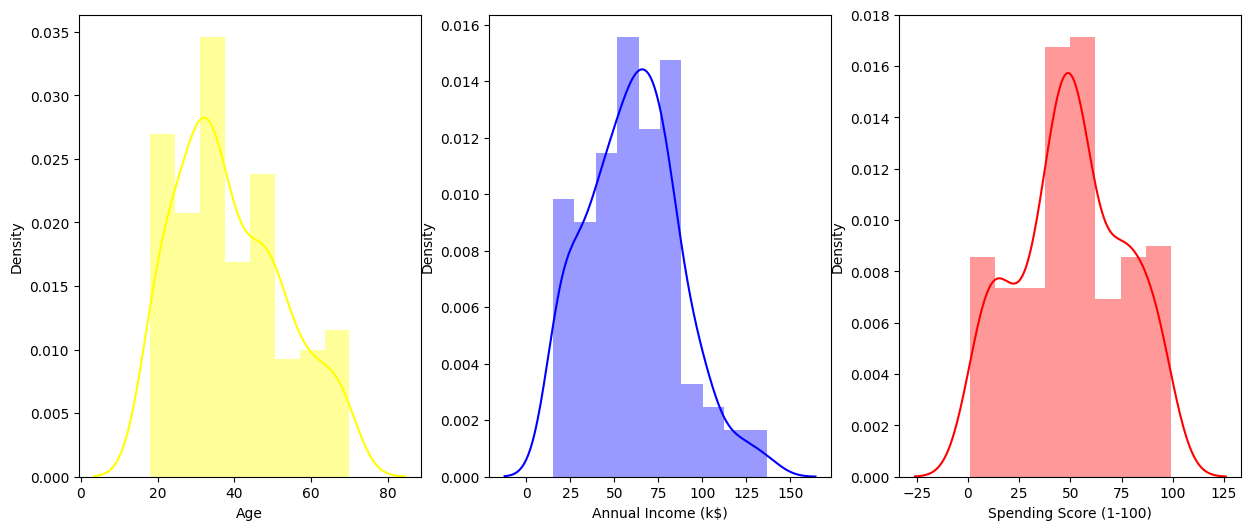

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.distplot(df["Age"], ax=axis[0], color="yellow")
sns.distplot(df["Annual Income (k$)"], ax=axis[1], color="blue")
sns.distplot(df["Spending Score (1-100)"], ax=axis[2], color="red")
plt.show()

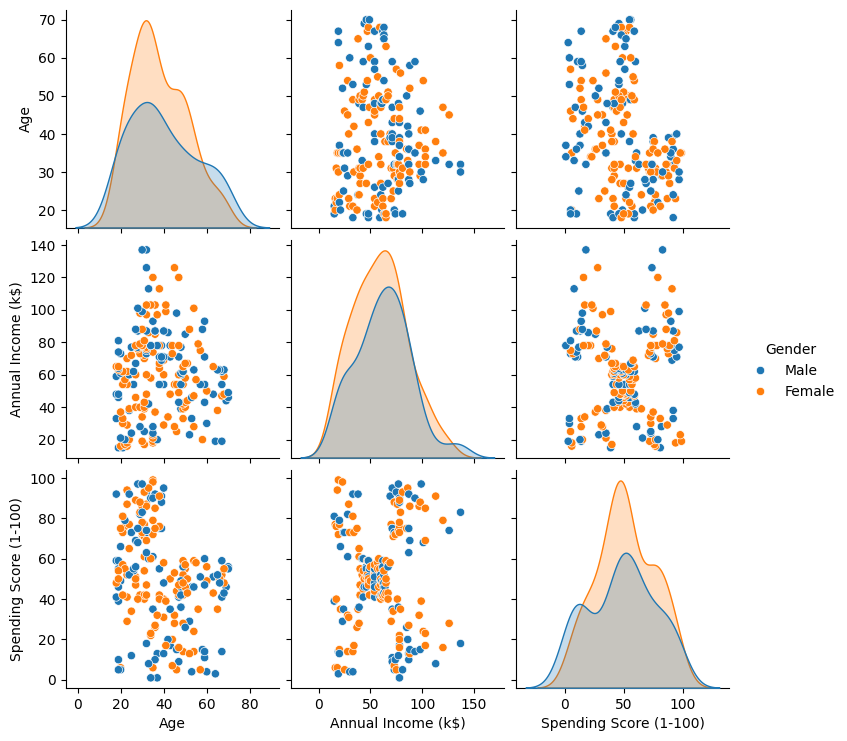

In [ ]:
sns.pairplot(df, vars= ["Age", "Annual Income (k$)", "Spending Score (1-100)"], hue="Gender")
plt.show()

### 2.1 Clustering based on Age and Spending Score.

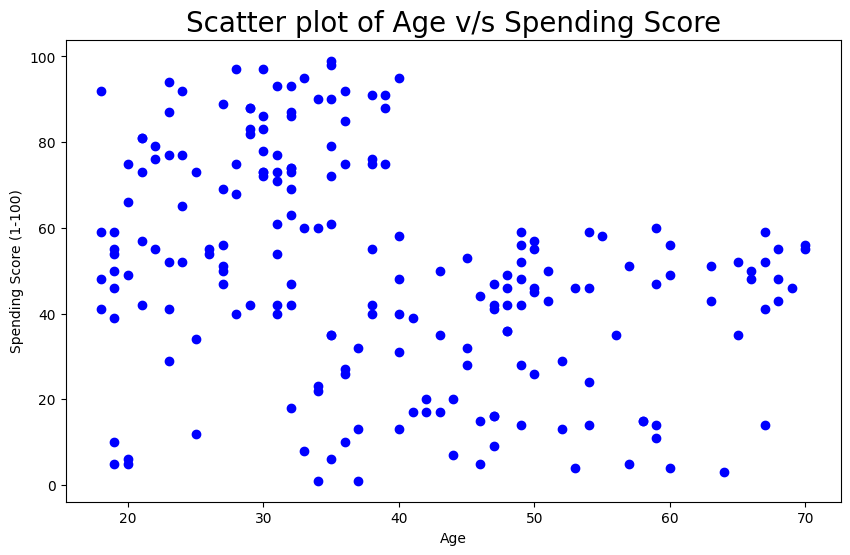

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df["Age"], y=df["Spending Score (1-100)"], color="b", marker="o")
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [ ]:
x1 = df[["Age", "Spending Score (1-100)"]].iloc[:, :].values
inertia = []
for i in range(1,15):
    algorithm = KMeans(
        n_clusters = i, 
        init="k-means++", 
        n_init=10, 
        max_iter=300, 
        tol=0.0001, 
        random_state=111, 
        algorithm="elkan" # Search for this in documentation.
    )
    algorithm.fit(x1)
    wcss = algorithm.inertia_
    inertia.append(wcss)

### Elbow plot

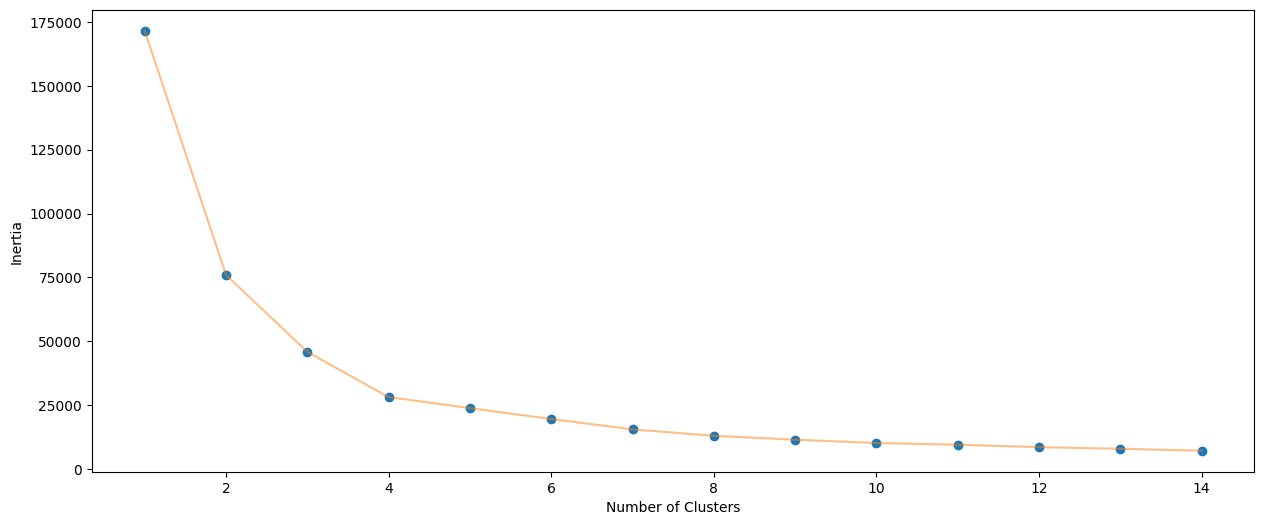

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(x1)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

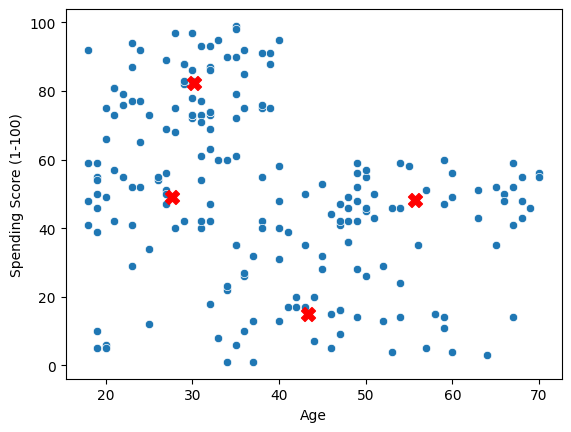

In [ ]:
sns.scatterplot(
    data=df, 
    x="Age", 
    y="Spending Score (1-100)"
)
plt.scatter(
    x=centroids1[:, 0], 
    y=centroids1[:, 1], 
    marker="X", 
    s=100, 
    color="r"
)
plt.show()

### Meshgrid plots.

In [ ]:
h = 0.02
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Study function np.meshgrid and ravel properties.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

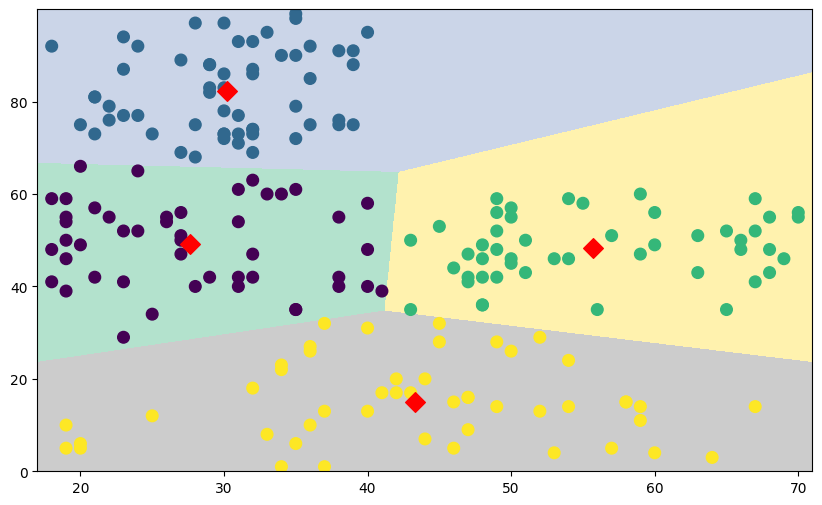

In [ ]:
plt.figure(1, figsize=(10, 6))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(
    Z, 
    interpolation="nearest", 
    extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
    cmap=plt.cm.Pastel2, 
    aspect="auto", 
    origin="lower"
)
plt.scatter(data=df, x="Age", y="Spending Score (1-100)", c=labels1, s=70)
plt.scatter(x=centroids1[:, 0], y=centroids1[:, 1], marker="D", s=100, color="r")
plt.show()

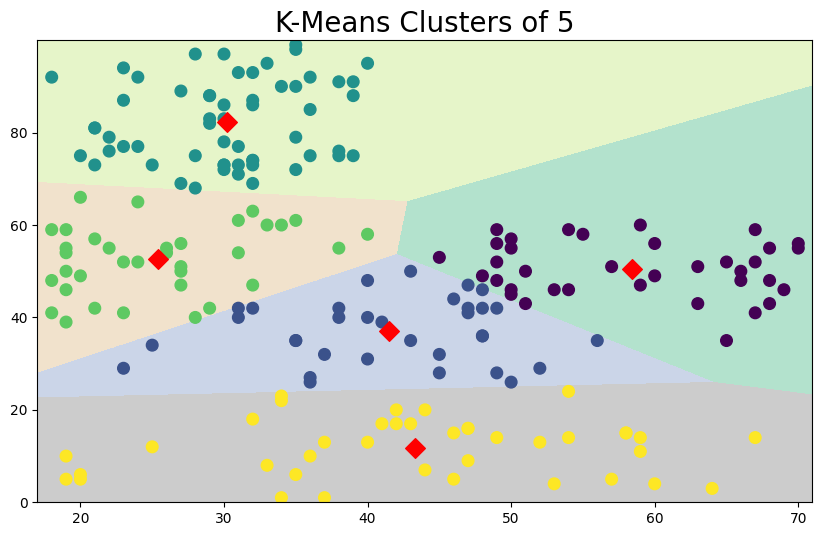

In [ ]:
clusters = 5
k.cluster_plot(df, clusters, ["Age", "Spending Score (1-100)"])
plt.title(f"K-Means Clusters of {clusters}", fontsize=20)
plt.show()

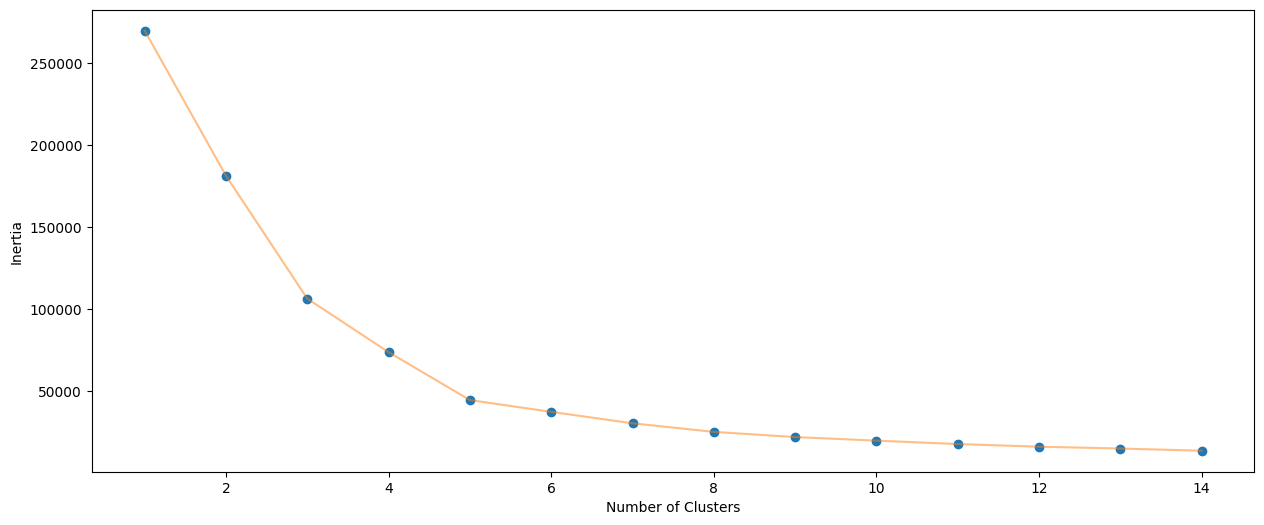

In [ ]:
k.elbow_plot(data=df, n=15, cols=["Annual Income (k$)", "Spending Score (1-100)"])

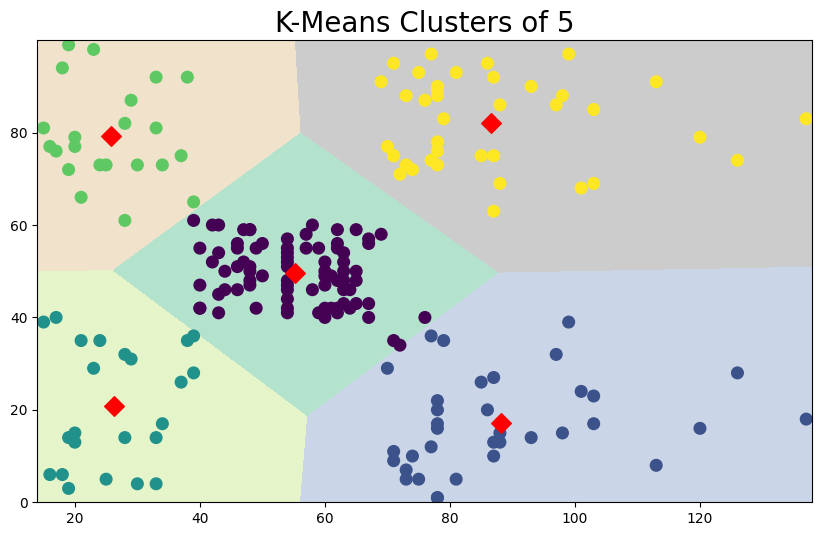

In [ ]:
k.cluster_plot(data=df, n=clusters, cols=["Annual Income (k$)", "Spending Score (1-100)"])
plt.title(f"K-Means Clusters of {clusters}", fontsize=20)
plt.show()

### 3. 3D Clustering: Age, Annual Income and Spending Score. 

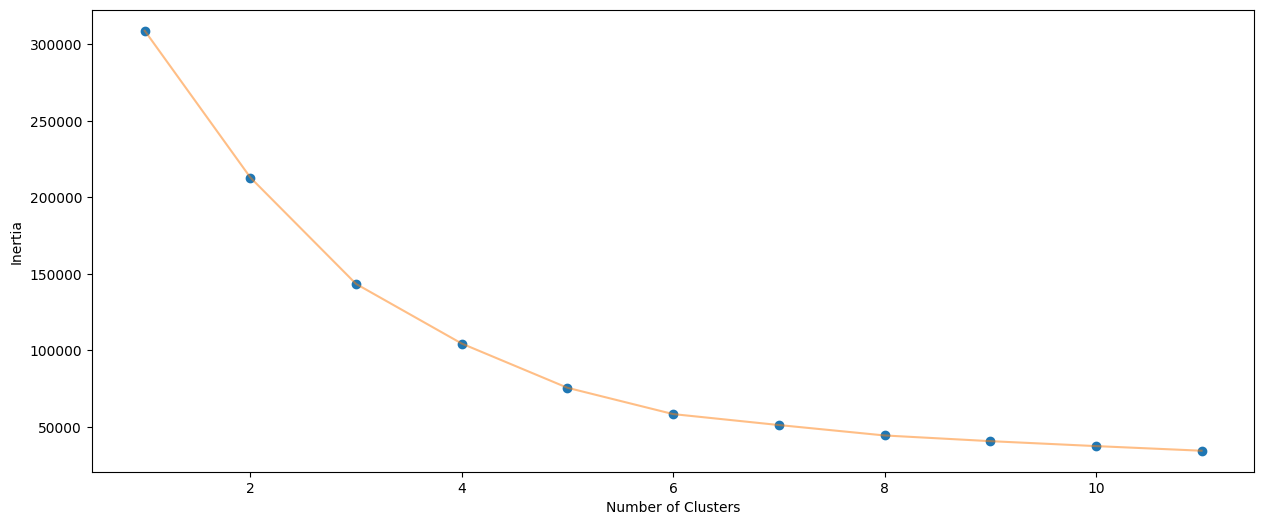

In [ ]:
k.elbow_plot(data=df, n=12, cols=["Age", "Annual Income (k$)", "Spending Score (1-100)"])

In [ ]:
x3 = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].iloc[:, :].values
kmeans_algorithm = KMeans(n_clusters=6)
kmeans_algorithm = kmeans_algorithm.fit(x3)
labels3 = kmeans_algorithm.labels_
centroids3 = kmeans_algorithm.cluster_centers_

In [ ]:
y_kmeans = kmeans_algorithm.fit_predict(x3)
df["cluster"] = pd.DataFrame(y_kmeans)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


In [ ]:
trace1 = go.Scatter3d(
    x = df["Age"],
    y = df["Spending Score (1-100)"],
    z = df["Annual Income (k$)"],
    mode = "markers",
    marker = dict(
        size = 10, 
        color = df["cluster"],
        line=dict(
            color = df["cluster"],
            width = 12
        ),
        opacity = 0.8
    )
)

In [ ]:
data = [trace1]
layout = go.Layout(
    title = "Clusters wrt Age, Income, and Spending Score",
    scene = dict(
        xaxis = dict(title = "Age"),
        yaxis = dict(title = "Spending Score"),
        zaxis = dict(title = "Annual Income")
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [ ]:
plt.rcParams["font.family"] = "Liberation Sans"

findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

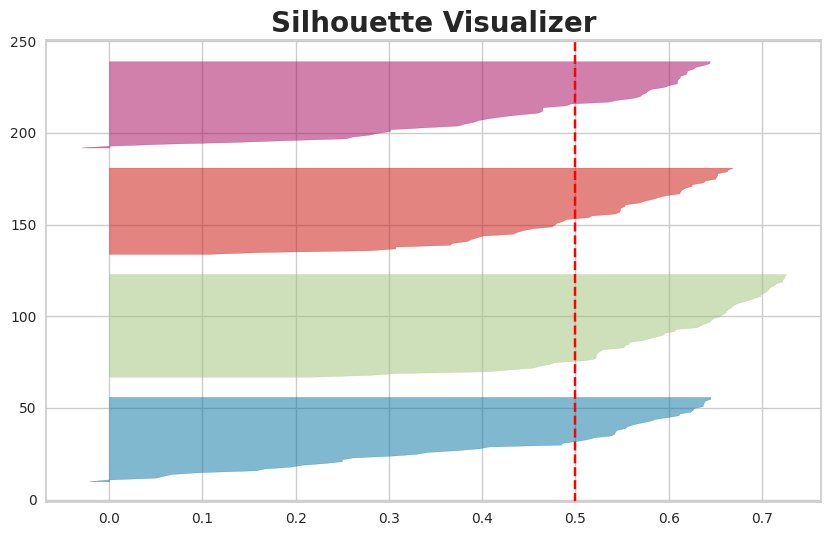

In [ ]:
plt.figure(figsize=(10,6))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(x1)
plt.title("Silhouette Visualizer", fontdict={"fontsize": 20, "fontweight": "bold"})
plt.show();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=49a4b13f-b86e-4dbe-8cae-5dc522a92da6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>